In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%D")

### Importing Data

In [2]:
face = pd.read_csv('facial_similarity_reports.csv',index_col=0, parse_dates=['created_at'])
document = pd.read_csv('doc_reports.csv',index_col=0)

In [3]:
face.head()

,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20 23:12:58+00:00,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20 23:16:04+00:00,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20 17:59:49+00:00,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20 17:59:39+00:00,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20 18:08:09+00:00,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [4]:
face.describe()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
count,176404,176403,166007,176404,175941,150290,176404,176404
unique,142724,2,2,169820,2,2,80,176404
top,2df96cd3537d415a9e7f23f419197187,clear,clear,2017-07-27 10:09:03+00:00,clear,clear,{},28d10cff04a74b97affc915b8e8b6559
freq,6,165486,165485,6,166004,147260,172921,1
first,NaN,NaN,NaN,2017-05-23 15:13:02+00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-10-31 23:54:24+00:00,NaN,NaN,NaN,NaN


In [5]:
document.head()

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


In [6]:
document.describe()

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
count,176404,176404,150290,176403,150261,176403,176404,175900,95217,95222,142974,92229,2548,176404,144557,45506,176404,176404
unique,142724,2,2,2,2,2,169810,2,2,2,2,2,2,176404,2,2,88557,4
top,2df96cd3537d415a9e7f23f419197187,clear,clear,clear,clear,clear,2017-07-27T10:09:03Z,clear,clear,clear,clear,clear,clear,28d10cff04a74b97affc915b8e8b6559,clear,clear,{},clear
freq,6,132402,147260,136660,149687,152000,6,174213,81652,95118,141335,92059,2386,1,144532,45483,26098,132402


In [7]:
print('Documents Check Results')
print(document.result.value_counts(normalize=True))
print('-'*30)
print('Facial Similarity Check Results')
print(face.result.value_counts(normalize=True))

Documents Check Results
clear       0.750561
consider    0.249439
Name: result, dtype: float64
------------------------------
Facial Similarity Check Results
clear       0.938113
consider    0.061887
Name: result, dtype: float64


### Data Pre-Processing

In [8]:
# Expand properties column in documents dataset
document['properties'] = document['properties'].apply(lambda x : dict(eval(x)) )
properties_expanded = document['properties'].apply(pd.Series)
document = pd.concat([document.drop(['properties'], axis=1), properties_expanded], axis=1)
document.head()

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,compromised_document_result,sub_result,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,...,NaN,caution,Male,IRL,passport,2019-08-12,IRL,NaN,NaN,NaN
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,...,NaN,clear,Female,NaN,driving_licence,2023-02-28,GBR,NaN,NaN,NaN
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,...,NaN,clear,Male,ITA,passport,2018-06-09,ITA,NaN,NaN,NaN
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,...,NaN,clear,Male,NaN,national_identity_card,NaN,FRA,2007-08,NaN,NaN
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,...,NaN,clear,Male,POL,national_identity_card,2019-05-29,POL,NaN,NaN,NaN


In [9]:
# Check if user_id are equal for the merge
print(document['user_id'].equals(face['user_id']))

# Perform a merge
df = face.merge(document, on=face.index,)
df = df.drop(['key_0'], 1)
df.head()

True


,user_id_x,result_x,face_comparison_result,created_at_x,facial_image_integrity_result,visual_authenticity_result_x,properties,attempt_id_x,user_id_y,result_y,...,compromised_document_result,sub_result,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20 23:12:58+00:00,clear,consider,{},050a0596de424fab83c433eaa18b3f8d,ab23fae164e34af0a1ad1423ce9fd9f0,consider,...,NaN,caution,Male,IRL,passport,2019-08-12,IRL,NaN,NaN,NaN
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20 23:16:04+00:00,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7,15a84e8951254011b47412fa4e8f65b8,clear,...,NaN,clear,Female,NaN,driving_licence,2023-02-28,GBR,NaN,NaN,NaN
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20 17:59:49+00:00,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769,ffb82fda52b041e4b9af9cb4ef298c85,clear,...,NaN,clear,Male,ITA,passport,2018-06-09,ITA,NaN,NaN,NaN
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20 17:59:39+00:00,clear,clear,{},10a54a1ecf794404be959e030f11fef6,bd4a8b3e3601427e88aa1d9eab9f4290,clear,...,NaN,clear,Male,NaN,national_identity_card,NaN,FRA,2007-08,NaN,NaN
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20 18:08:09+00:00,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9,f52ad1c7e69543a9940c3e7f8ed28a39,clear,...,NaN,clear,Male,POL,national_identity_card,2019-05-29,POL,NaN,NaN,NaN


In [10]:
# Define criteria for passing both checks
criteria_1 = df['result_x'] == 'clear'
criteria_2 = df['result_y'] == 'clear'

# Create binarised variable for passing the checks
df['pass'] = np.where((criteria_1) & (criteria_2), 1,0)

# Create binarised variables for both facial check and document check
df['face_check'] = np.where(criteria_1, 1,0)
df['documents_check'] = np.where(criteria_2, 1,0)

In [11]:
# Drop empty properties column
df.drop('properties',axis=1,inplace=True)

In [12]:
df.head()

,user_id_x,result_x,face_comparison_result,created_at_x,facial_image_integrity_result,visual_authenticity_result_x,attempt_id_x,user_id_y,result_y,visual_authenticity_result_y,...,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version,pass,face_check,documents_check
0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20 23:12:58+00:00,clear,consider,050a0596de424fab83c433eaa18b3f8d,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,...,IRL,passport,2019-08-12,IRL,NaN,NaN,NaN,0,1,0
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20 23:16:04+00:00,clear,clear,f69c1e5f45a64e50a26740b9bfb978b7,15a84e8951254011b47412fa4e8f65b8,clear,clear,...,NaN,driving_licence,2023-02-28,GBR,NaN,NaN,NaN,1,1,1
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20 17:59:49+00:00,clear,clear,f9f84f3055714d8e8f7419dc984d1769,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,...,ITA,passport,2018-06-09,ITA,NaN,NaN,NaN,1,1,1
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20 17:59:39+00:00,clear,clear,10a54a1ecf794404be959e030f11fef6,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,...,NaN,national_identity_card,NaN,FRA,2007-08,NaN,NaN,1,1,1
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20 18:08:09+00:00,clear,clear,1f320d1d07de493292b7e0d5ebfb1cb9,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,...,POL,national_identity_card,2019-05-29,POL,NaN,NaN,NaN,1,1,1


In [13]:
df.columns

Index(['user_id_x', 'result_x', 'face_comparison_result', 'created_at_x',
       'facial_image_integrity_result', 'visual_authenticity_result_x',
       'attempt_id_x', 'user_id_y', 'result_y', 'visual_authenticity_result_y',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_y', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id_y', 'police_record_result',
       'compromised_document_result', 'sub_result', 'gender', 'nationality',
       'document_type', 'date_of_expiry', 'issuing_country', 'issuing_date',
       'issuing_state', 'document_version', 'pass', 'face_check',
       'documents_check'],
      dtype='object')

In [14]:
# Cast all timestamps as a datetime objects
document['created_at'] = pd.to_datetime(document['created_at'])
document['date_of_expiry'] = pd.to_datetime(document['date_of_expiry'],errors='coerce')
document['created_at'] = document['created_at'].dt.strftime('%Y-%m-%d')
face['created_at'] = pd.to_datetime(face['created_at'])

In [15]:
# Adjust index
df.sort_values(["created_at_x"], inplace=True)
df.reset_index(drop=True,inplace=True)
df.set_index('created_at_x', inplace=True)

### Exploring Pass Rate Trends
Use moving average calculations for trend detection

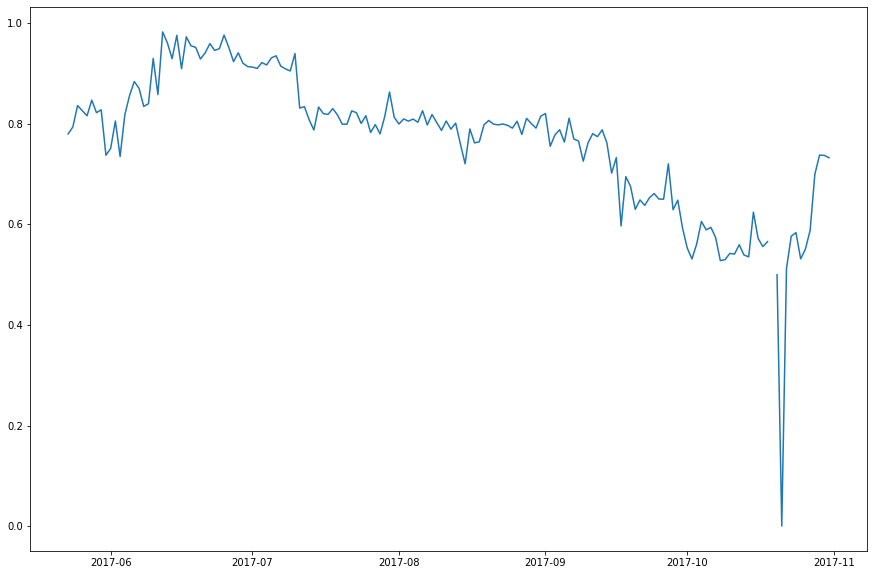

In [16]:
# Generate Daily Pass Rate
daily_pass_rate = df['pass'].resample('1D').sum().ffill() / df['pass'].resample('1D').count().ffill()
plt.figure(figsize=(15,10))
plt.plot(daily_pass_rate)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


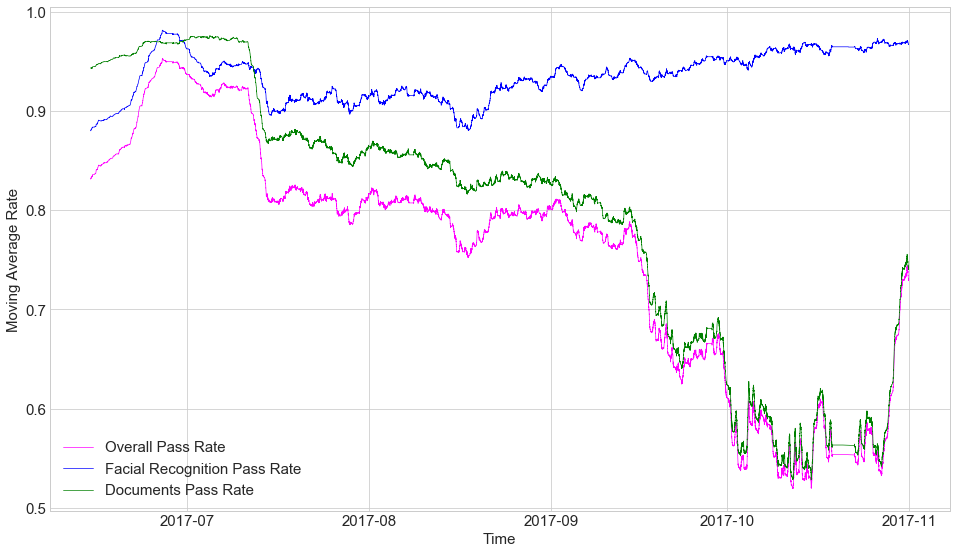

In [54]:
fig = plt.figure(figsize=(25,7))
ax = fig.add_axes([0,0,0.5,1])
plt.rcParams['font.size'] = '15'
plt.rcParams["font.family"] = "Helvetica"
plt.style.use('seaborn-whitegrid')
ax.plot(df['pass'].rolling(window=4000).mean(), label='Overall Pass Rate',
        linewidth=0.7, color='magenta')
ax.plot(df['face_check'].rolling(window=4000).mean(), label='Facial Recognition Pass Rate',
        linewidth=0.7, color='blue')
ax.plot(df['documents_check'].rolling(window=4000).mean(), label='Documents Pass Rate',
        linewidth=0.7, color='green')
ax.legend()
plt.ylabel("Moving Average Rate",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.show()

### Explore Document Pass Rates

In [18]:
document.columns

Index(['user_id', 'result', 'visual_authenticity_result',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'sub_result', 'gender', 'nationality',
       'document_type', 'date_of_expiry', 'issuing_country', 'issuing_date',
       'issuing_state', 'document_version'],
      dtype='object')

In [19]:
ls = ['visual_authenticity_result', 'image_integrity_result', 'data_validation_result', 'image_quality_result',
      'data_consistency_result', 'data_comparison_result', 'police_record_result', 'compromised_document_result',
     'colour_picture_result', 'conclusive_document_quality_result', 'supported_document_result']

for i in ls:
    criteria = document[i] == 'clear'
    df[i+'_binary'] = np.where(criteria, 1,0)

In [20]:
df

,user_id_x,result_x,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_x,attempt_id_x,user_id_y,result_y,visual_authenticity_result_y,image_integrity_result,...,image_integrity_result_binary,data_validation_result_binary,image_quality_result_binary,data_consistency_result_binary,data_comparison_result_binary,police_record_result_binary,compromised_document_result_binary,colour_picture_result_binary,conclusive_document_quality_result_binary,supported_document_result_binary
created_at_x,,,,,,,,,,,,,,,,,,,,,
2017-05-23 15:13:02+00:00,3aee7324dfba466d96888ff9ad185b58,clear,clear,clear,clear,d21de828c5514277aaedb316edc6c48c,3aee7324dfba466d96888ff9ad185b58,clear,clear,clear,...,1,1,1,1,0,1,0,0,0,1
2017-05-23 15:18:05+00:00,206b6bd0cc114844b471fb750e1c9b8c,consider,NaN,consider,clear,b92d851b2380442cbe373c33f1c9dc44,206b6bd0cc114844b471fb750e1c9b8c,clear,clear,clear,...,1,1,1,0,0,1,0,0,0,1
2017-05-23 15:22:16+00:00,8edd77f60f8e4a739f35cb797b292e6d,consider,NaN,consider,clear,b21d5797e8864adbb215182218094cfb,8edd77f60f8e4a739f35cb797b292e6d,clear,clear,clear,...,1,1,1,1,0,1,0,0,0,1
2017-05-23 15:27:06+00:00,636fb441d54446a8996e3ff79e09535f,clear,clear,clear,clear,63485edd8dca4d25b95d1dd4484b3bd6,636fb441d54446a8996e3ff79e09535f,consider,clear,clear,...,1,1,1,1,0,1,0,0,0,1
2017-05-23 15:27:56+00:00,fffa227d01064f9f9cef396d893863c1,clear,clear,clear,clear,c991888dc7c044f2bfdfe058c3aaa45d,fffa227d01064f9f9cef396d893863c1,clear,clear,clear,...,1,1,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31 23:48:46+00:00,7c7883d7eadb48de8cb95e7caca35482,clear,clear,clear,clear,078f0b595b7142409b95b05d854e28b7,7c7883d7eadb48de8cb95e7caca35482,clear,clear,clear,...,1,1,1,1,0,1,0,0,0,1
2017-10-31 23:48:56+00:00,10e769ef3e8549e99e3ddcc2608288db,clear,clear,clear,clear,f08f752e52644978bdc9e6fb734fb440,10e769ef3e8549e99e3ddcc2608288db,clear,clear,clear,...,1,1,1,0,0,1,0,0,0,1
2017-10-31 23:52:31+00:00,23cba062c5204136b79724be34d41626,clear,clear,clear,clear,223c7402716b44e9a9319a94653cc39f,23cba062c5204136b79724be34d41626,clear,clear,clear,...,1,1,1,1,0,1,0,0,0,1


In [21]:
# Adjust index
document.reset_index(drop=True,inplace=True)
document.sort_values(['created_at'], inplace=True)
document.set_index('created_at', inplace=True)

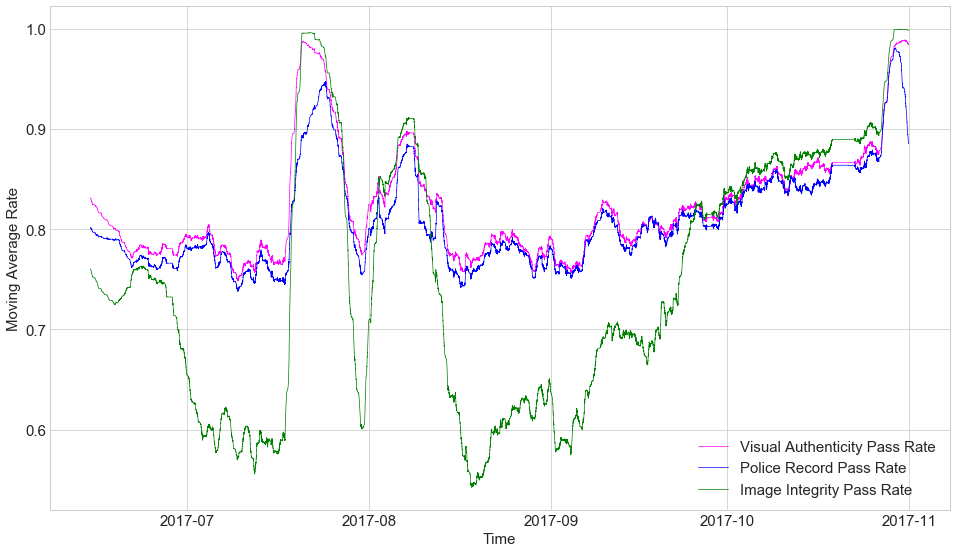

In [22]:
fig = plt.figure(figsize=(25,7))
ax = fig.add_axes([0,0,0.5,1])
plt.rcParams['font.size'] = '15'
plt.rcParams["font.family"] = "Helvetica"
plt.style.use('seaborn-whitegrid')

ax.plot(df['visual_authenticity_result_binary'].rolling(window=4000).mean(),
        label='Visual Authenticity Pass Rate', color='magenta', linewidth=0.7)
ax.plot(df['police_record_result_binary'].rolling(window=4000).mean(),
        label='Police Record Pass Rate', color='blue', linewidth=0.7)
ax.plot(df['image_integrity_result_binary'].rolling(window=4000).mean(),
        label='Image Integrity Pass Rate', color='green', linewidth=0.7)

#ax.plot(df['data_validation_result_binary'].rolling(window=4000).mean(),
#        label='Data Validation Pass Rate', color='red', linewidth=0.7)
#ax.plot(df['data_consistency_result_binary'].rolling(window=4000).mean(),
#        label='Data Consistency Pass Rate', color='gold', linewidth=0.7)
#ax.plot(df['data_comparison_result_binary'].rolling(window=4000).mean(),
#        label='Data Comparison Pass Rate', color='gray', linewidth=0.7)
#ax.plot(df['compromised_document_result_binary'].rolling(window=4000).mean(),
#        label='Compromised Document Pass Rate', color='orange', linewidth=0.7)

ax.legend(loc=0)
plt.ylabel("Moving Average Rate",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.show()

### Sub Results for Failed Documents Check

In [23]:
rejected = df['sub_result'] == 'rejected' 
caution = df['sub_result'] == 'caution'
suspected = df['sub_result'] == 'suspected'
failure = df['pass'] == 0

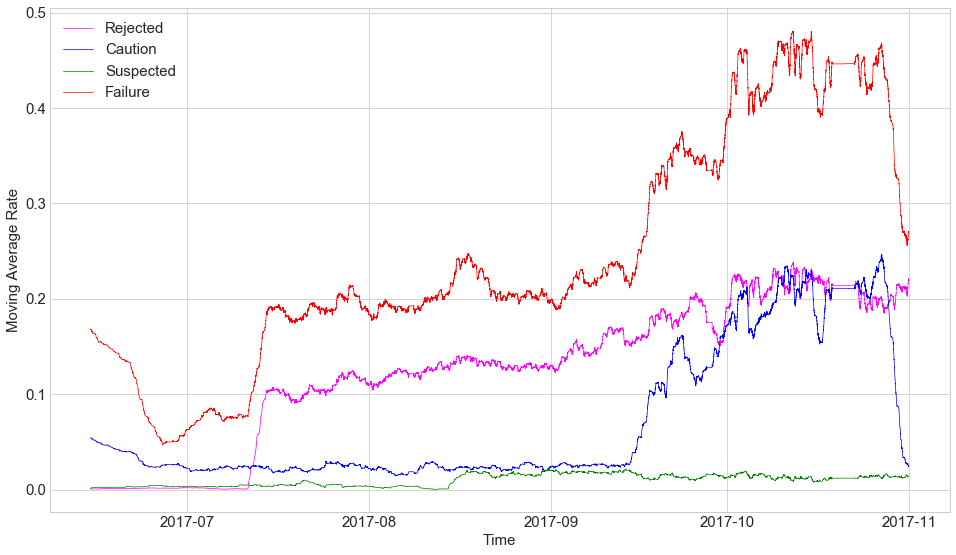

In [24]:
fig = plt.figure(figsize=(25,7))
ax = fig.add_axes([0,0,0.5,1])
plt.rcParams['font.size'] = '15'
plt.rcParams["font.family"] = "Helvetica"
plt.style.use('seaborn-whitegrid')
ax.plot(rejected.rolling(window=4000).mean(),
        label='Rejected', color='magenta', linewidth=0.7)
ax.plot(caution.rolling(window=4000).mean(),
        label='Caution', color='blue', linewidth=0.7)
ax.plot(suspected.rolling(window=4000).mean(),
        label='Suspected', color='green', linewidth=0.7)
ax.plot(failure.rolling(window=4000).mean(),
        label='Failure', color='red', linewidth=0.7)
ax.legend(loc=0)
plt.ylabel("Moving Average Rate",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.show()

### Image Integrity Result

In [25]:
df['conclusive_document_quality_result'].value_counts()

clear       81652
consider    13565
Name: conclusive_document_quality_result, dtype: int64

In [26]:
# Create a seperate DF for cdq result, select only values that are not NaN
cdq = df.loc[(df['conclusive_document_quality_result'] == 'clear')
            | ((df['conclusive_document_quality_result'] == 'consider'))]
# Binarise
cdq['conclusive_document_quality_result'] = np.where(cdq['conclusive_document_quality_result'] == 'clear', 1,0)
# See if value counts matches the vale counts of df['conclusive_document_quality_result']
cdq['conclusive_document_quality_result'].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1    81652
0    13565
Name: conclusive_document_quality_result, dtype: int64

In [62]:
# Create a seperate DF for image quality result, select only values that are not NaN
iq = df.loc[(df['image_quality_result'] == 'clear')
            | ((df['image_quality_result'] == 'consider'))]
# Binarise
iq['image_quality_result'] = np.where(iq['image_quality_result'] == 'clear', 1,0)

# Create a seperate DF for colour picture result, select only values that are not NaN
cp = df.loc[(df['colour_picture_result'] == 'clear')
            | ((df['colour_picture_result'] == 'consider'))]
# Binarise
cp['colour_picture_result'] = np.where((cp['colour_picture_result'] == 'clear'), 1,0)

# Repeat for supported document
sp = df.loc[(df['supported_document_result'] == 'clear')
            | ((df['supported_document_result'] == 'consider'))]
sp['supported_document_result'] = np.where(sp['supported_document_result'] == 'clear', 1,0)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [28]:
df['image_quality_result'].value_counts()

clear           152000
unidentified     24403
Name: image_quality_result, dtype: int64

In [29]:
iq['image_quality_result'].value_counts()

1    152000
Name: image_quality_result, dtype: int64

In [30]:
df['colour_picture_result'].value_counts()

clear       95118
consider      104
Name: colour_picture_result, dtype: int64

In [61]:
cp['colour_picture_result'].value_counts()

1    95222
Name: colour_picture_result, dtype: int64

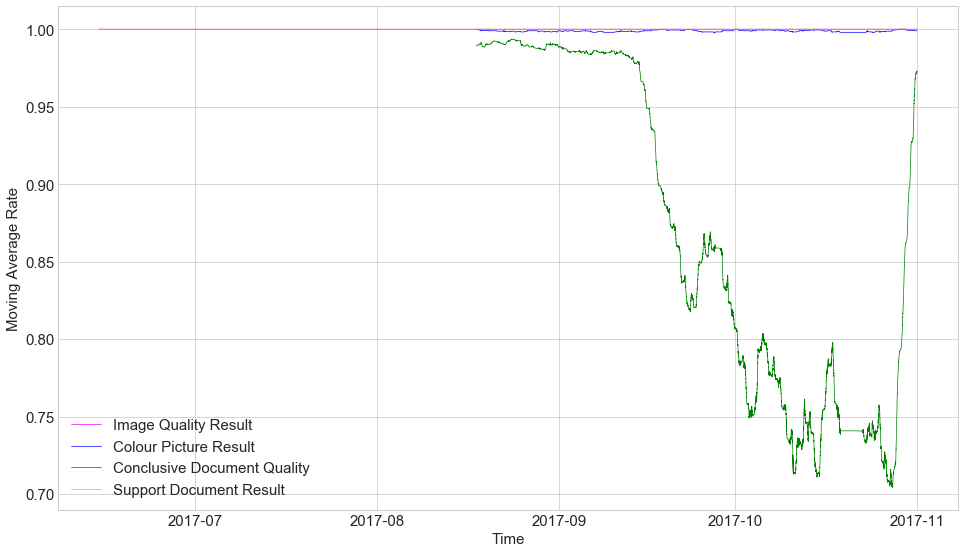

In [63]:
fig = plt.figure(figsize=(25,7))
ax = fig.add_axes([0,0,0.5,1])
plt.rcParams['font.size'] = '15'
plt.rcParams["font.family"] = "Helvetica"
plt.style.use('seaborn-whitegrid')

ax.plot(iq['image_quality_result'].rolling(window=4000).mean(),
        label='Image Quality Result', color='magenta', linewidth=0.7)

ax.plot(cp['colour_picture_result'].rolling(window=4000).mean(),
        label='Colour Picture Result', color='blue', linewidth=0.7)

ax.plot(cdq['conclusive_document_quality_result'].rolling(window=4000).mean(),
        label='Conclusive Document Quality', color='green', linewidth=0.7)

ax.plot(sp['supported_document_result'].rolling(window=4000).mean(),
        label='Support Document Result', color='orange', linewidth=0.7)

ax.legend(loc=0)
plt.ylabel("Moving Average Rate",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.show()

### Assessing which types of documents tend to fail the most

In [33]:
# Get document value counts for all entries
df['document_type'].value_counts()

national_identity_card    54613
driving_licence           50492
passport                  42228
residence_permit           2929
work_permit                  17
voter_id                     11
tax_id                        7
birth_certificate             1
Name: document_type, dtype: int64

In [34]:
# Get document types value counts for entries that failed the document check
df.loc[df['result_y'] != 'clear']['document_type'].value_counts()

passport                  7094
driving_licence           5627
national_identity_card    4868
residence_permit           309
work_permit                  1
Name: document_type, dtype: int64

In [35]:
# Get a failed document document types as a percentage of all entries
df.loc[df['result_y'] != 'clear']['document_type'].value_counts()/df['document_type'].value_counts()

birth_certificate              NaN
driving_licence           0.111443
national_identity_card    0.089136
passport                  0.167993
residence_permit          0.105497
tax_id                         NaN
voter_id                       NaN
work_permit               0.058824
Name: document_type, dtype: float64

In [36]:
# Get issuing country value counts for all entries
df['issuing_country'].value_counts()

GBR    39681
FRA    23522
LTU    12975
ESP     9464
IRL     9232
       ...  
MWI        1
Svn        1
SLE        1
BRN        1
GMB        1
Name: issuing_country, Length: 168, dtype: int64

In [37]:
# Get issuing country value counts for entries that failed the document check
df.loc[df['result_y'] != 'clear']['issuing_country'].value_counts()

GBR    6034
FRA    2524
LTU    1388
IRL    1362
ESP     858
       ... 
OMN       1
ZWE       1
GEO       1
MLI       1
KEN       1
Name: issuing_country, Length: 119, dtype: int64

In [38]:
# Get a failed document issuing country types as a percentage of all entries
df.loc[df['result_y'] != 'clear']['issuing_country'].value_counts() / df['issuing_country'].value_counts()

AFG         NaN
AGO         NaN
ALB    0.115385
ARE    0.120000
ARG    0.111111
         ...   
VNM    0.161290
ZAF    0.090226
ZIM         NaN
ZMB         NaN
ZWE    0.333333
Name: issuing_country, Length: 168, dtype: float64

In [39]:
df['gender'].value_counts()

Male      78397
Female    41536
8             3
FEMALE        1
MALE          1
Name: gender, dtype: int64

In [40]:
df.loc[df['result_y'] != 'clear']['gender'].value_counts()

Male      10183
Female     5200
8             2
Name: gender, dtype: int64

In [41]:
df.loc[df['result_y'] != 'clear']['gender'].value_counts()/df['gender'].value_counts()

8         0.666667
FEMALE         NaN
Female    0.125193
MALE           NaN
Male      0.129890
Name: gender, dtype: float64

In [42]:
document.columns

Index(['user_id', 'result', 'visual_authenticity_result',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'sub_result', 'gender', 'nationality',
       'document_type', 'date_of_expiry', 'issuing_country', 'issuing_date',
       'issuing_state', 'document_version'],
      dtype='object')

In [43]:
document.loc[document['image_integrity_result']!='clear']

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,...,compromised_document_result,sub_result,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
created_at,,,,,,,,,,,,,,,,,,,,,
2017-06-07,23f1ab4dd4164782b9206483ab9441b8,consider,NaN,consider,NaN,clear,unidentified,NaN,NaN,NaN,...,NaN,rejected,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2017-06-08,604bbae136474d2cba14b9a14ff39297,consider,NaN,consider,NaN,clear,unidentified,NaN,NaN,NaN,...,NaN,rejected,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2017-06-13,c2861dcc90d740089f15af383559cb09,consider,NaN,consider,NaN,clear,unidentified,NaN,NaN,NaN,...,NaN,rejected,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2017-06-16,e09ea87cd0bc4a16b118728972feb0c4,consider,NaN,consider,NaN,clear,unidentified,NaN,NaN,NaN,...,NaN,rejected,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2017-06-21,abf98cdd52ec4ecb978e66a6a293f1ac,consider,NaN,consider,NaN,clear,unidentified,NaN,NaN,NaN,...,NaN,rejected,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31,97f75c4933514a08aa1d196794d0fb21,consider,NaN,consider,NaN,unidentified,clear,NaN,NaN,NaN,...,NaN,rejected,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2017-10-31,fada6b0eab1f4e15b79a8f29e85ce0b6,consider,NaN,consider,NaN,unidentified,clear,NaN,NaN,NaN,...,NaN,rejected,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2017-10-31,79464b2102a6457e9f0a066586aafe6e,consider,clear,consider,clear,clear,clear,consider,clear,clear,...,clear,caution,Female,AUT,passport,2026-03-17,AUT,NaN,NaN,NaN


In [44]:
document.head()

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,...,compromised_document_result,sub_result,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
created_at,,,,,,,,,,,,,,,,,,,,,
2017-05-23,eb880365e8224b469d4503e3434b2853,clear,clear,clear,clear,clear,clear,NaN,NaN,clear,...,NaN,clear,Female,CHN,passport,2025-09-06,CHN,NaN,NaN,NaN
2017-05-23,c7d536122c2c494cb08757c6e2806093,clear,clear,clear,clear,clear,clear,NaN,NaN,clear,...,NaN,clear,Male,POL,national_identity_card,2025-12-28,POL,NaN,NaN,NaN
2017-05-23,6e01ed0df18948808d4d8b2762ccd116,clear,clear,clear,clear,clear,clear,NaN,NaN,clear,...,NaN,clear,NaN,NaN,driving_licence,2031-06-10,GRC,NaN,NaN,NaN
2017-05-23,6e01ed0df18948808d4d8b2762ccd116,clear,clear,clear,clear,clear,clear,NaN,NaN,clear,...,NaN,clear,NaN,NaN,driving_licence,2031-06-10,GRC,NaN,NaN,NaN
2017-05-23,4b939fe40b2346c5a8b820fa9977e1ef,clear,clear,clear,clear,clear,clear,NaN,NaN,clear,...,NaN,clear,Male,NaN,driving_licence,2022-07-30,GBR,NaN,NaN,NaN


In [45]:
document.loc[document['image_integrity_result'] == 'clear']

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,...,compromised_document_result,sub_result,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
created_at,,,,,,,,,,,,,,,,,,,,,
2017-05-23,eb880365e8224b469d4503e3434b2853,clear,clear,clear,clear,clear,clear,NaN,NaN,clear,...,NaN,clear,Female,CHN,passport,2025-09-06,CHN,NaN,NaN,NaN
2017-05-23,c7d536122c2c494cb08757c6e2806093,clear,clear,clear,clear,clear,clear,NaN,NaN,clear,...,NaN,clear,Male,POL,national_identity_card,2025-12-28,POL,NaN,NaN,NaN
2017-05-23,6e01ed0df18948808d4d8b2762ccd116,clear,clear,clear,clear,clear,clear,NaN,NaN,clear,...,NaN,clear,NaN,NaN,driving_licence,2031-06-10,GRC,NaN,NaN,NaN
2017-05-23,6e01ed0df18948808d4d8b2762ccd116,clear,clear,clear,clear,clear,clear,NaN,NaN,clear,...,NaN,clear,NaN,NaN,driving_licence,2031-06-10,GRC,NaN,NaN,NaN
2017-05-23,4b939fe40b2346c5a8b820fa9977e1ef,clear,clear,clear,clear,clear,clear,NaN,NaN,clear,...,NaN,clear,Male,NaN,driving_licence,2022-07-30,GBR,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31,09cfabad9d164883b39cf6dc69022613,clear,clear,clear,clear,clear,clear,clear,clear,clear,...,clear,clear,Male,RUS,residence_permit,2019-01-18,GBR,NaN,NaN,NaN
2017-10-31,71a046db455946318d313b76a68f3953,clear,clear,clear,clear,clear,clear,clear,clear,clear,...,clear,clear,Female,USA,residence_permit,2019-01-11,GBR,NaN,NaN,NaN
2017-10-31,124aaeed854c48f38755a278c765861d,clear,clear,clear,clear,clear,clear,clear,clear,clear,...,clear,clear,NaN,NaN,driving_licence,2023-04-04,LTU,2013-04-04,NaN,NaN


In [46]:
df.loc[df['image_integrity_result_binary'] == 1]

,user_id_x,result_x,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_x,attempt_id_x,user_id_y,result_y,visual_authenticity_result_y,image_integrity_result,...,image_integrity_result_binary,data_validation_result_binary,image_quality_result_binary,data_consistency_result_binary,data_comparison_result_binary,police_record_result_binary,compromised_document_result_binary,colour_picture_result_binary,conclusive_document_quality_result_binary,supported_document_result_binary
created_at_x,,,,,,,,,,,,,,,,,,,,,
2017-05-23 15:13:02+00:00,3aee7324dfba466d96888ff9ad185b58,clear,clear,clear,clear,d21de828c5514277aaedb316edc6c48c,3aee7324dfba466d96888ff9ad185b58,clear,clear,clear,...,1,1,1,1,0,1,0,0,0,1
2017-05-23 15:18:05+00:00,206b6bd0cc114844b471fb750e1c9b8c,consider,NaN,consider,clear,b92d851b2380442cbe373c33f1c9dc44,206b6bd0cc114844b471fb750e1c9b8c,clear,clear,clear,...,1,1,1,0,0,1,0,0,0,1
2017-05-23 15:22:16+00:00,8edd77f60f8e4a739f35cb797b292e6d,consider,NaN,consider,clear,b21d5797e8864adbb215182218094cfb,8edd77f60f8e4a739f35cb797b292e6d,clear,clear,clear,...,1,1,1,1,0,1,0,0,0,1
2017-05-23 15:27:06+00:00,636fb441d54446a8996e3ff79e09535f,clear,clear,clear,clear,63485edd8dca4d25b95d1dd4484b3bd6,636fb441d54446a8996e3ff79e09535f,consider,clear,clear,...,1,1,1,1,0,1,0,0,0,1
2017-05-23 15:27:56+00:00,fffa227d01064f9f9cef396d893863c1,clear,clear,clear,clear,c991888dc7c044f2bfdfe058c3aaa45d,fffa227d01064f9f9cef396d893863c1,clear,clear,clear,...,1,1,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31 23:48:46+00:00,7c7883d7eadb48de8cb95e7caca35482,clear,clear,clear,clear,078f0b595b7142409b95b05d854e28b7,7c7883d7eadb48de8cb95e7caca35482,clear,clear,clear,...,1,1,1,1,0,1,0,0,0,1
2017-10-31 23:48:56+00:00,10e769ef3e8549e99e3ddcc2608288db,clear,clear,clear,clear,f08f752e52644978bdc9e6fb734fb440,10e769ef3e8549e99e3ddcc2608288db,clear,clear,clear,...,1,1,1,0,0,1,0,0,0,1
2017-10-31 23:52:31+00:00,23cba062c5204136b79724be34d41626,clear,clear,clear,clear,223c7402716b44e9a9319a94653cc39f,23cba062c5204136b79724be34d41626,clear,clear,clear,...,1,1,1,1,0,1,0,0,0,1


In [47]:
document.columns

Index(['user_id', 'result', 'visual_authenticity_result',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'sub_result', 'gender', 'nationality',
       'document_type', 'date_of_expiry', 'issuing_country', 'issuing_date',
       'issuing_state', 'document_version'],
      dtype='object')

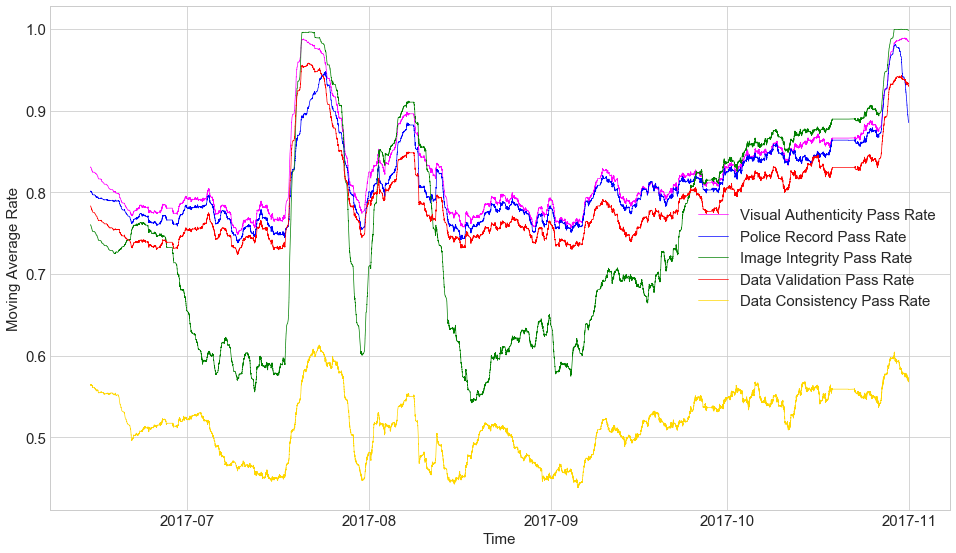

In [55]:
fig = plt.figure(figsize=(25,7))
ax = fig.add_axes([0,0,0.5,1])
plt.rcParams['font.size'] = '15'
plt.rcParams["font.family"] = "Helvetica"
plt.style.use('seaborn-whitegrid')

ax.plot(df['visual_authenticity_result_binary'].rolling(window=4000).mean(),
        label='Visual Authenticity Pass Rate', color='magenta', linewidth=0.7)
ax.plot(df['police_record_result_binary'].rolling(window=4000).mean(),
        label='Police Record Pass Rate', color='blue', linewidth=0.7)
ax.plot(df['image_integrity_result_binary'].rolling(window=4000).mean(),
        label='Image Integrity Pass Rate', color='green', linewidth=0.7)
ax.plot(df['data_validation_result_binary'].rolling(window=4000).mean(),
        label='Data Validation Pass Rate', color='red', linewidth=0.7)
ax.plot(df['data_consistency_result_binary'].rolling(window=4000).mean(),
        label='Data Consistency Pass Rate', color='gold', linewidth=0.7)

#ax.plot(df['image_integrity_result_binary'].rolling(window=4000).mean(),
#        label='Image Integrity Pass Rate', color='orange', linewidth=0.7)

ax.legend(loc=0)
plt.ylabel("Moving Average Rate",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.show()

In [49]:
document['image_integrity_result'].value_counts()

clear       136660
consider     39743
Name: image_integrity_result, dtype: int64

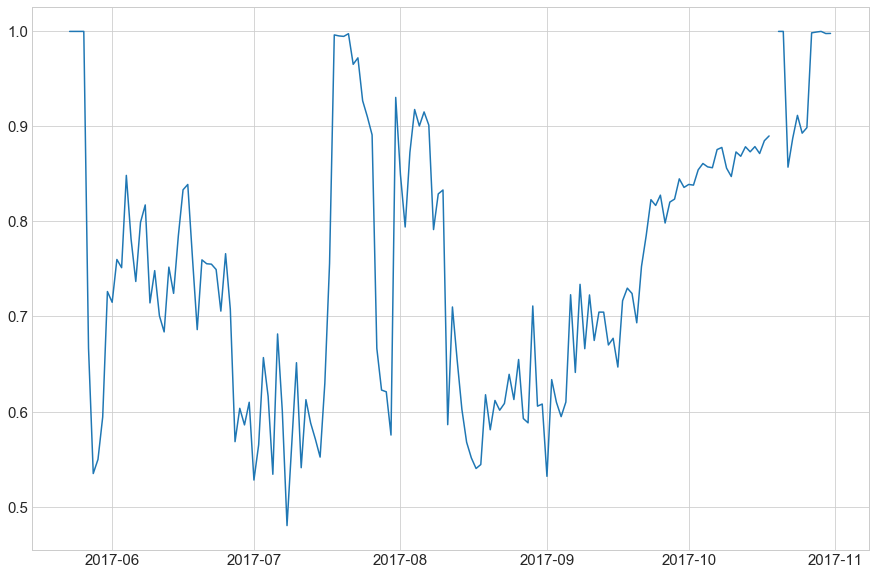

In [50]:
daily_irr = df['image_integrity_result_binary'].resample('1D').sum().ffill() / df['image_integrity_result_binary'].resample('1D').count().ffill()
plt.figure(figsize=(15,10))
plt.plot(daily_irr)

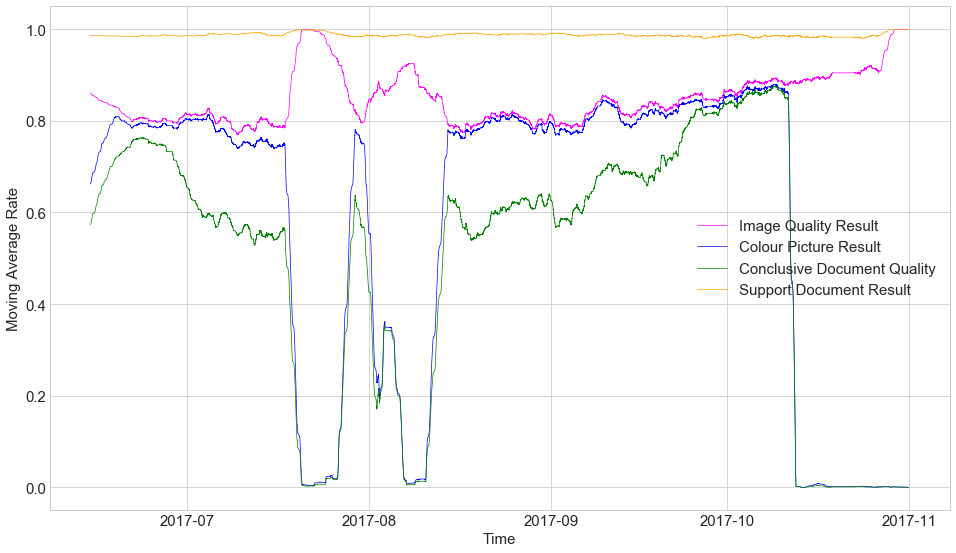

In [51]:
fig = plt.figure(figsize=(25,7))
ax = fig.add_axes([0,0,0.5,1])
plt.rcParams['font.size'] = '15'
plt.rcParams["font.family"] = "Helvetica"
plt.style.use('seaborn-whitegrid')

ax.plot(df['image_quality_result_binary'].rolling(window=4000).mean(),
        label='Image Quality Result', color='magenta', linewidth=0.7)

ax.plot(df['colour_picture_result_binary'].rolling(window=4000).mean(),
        label='Colour Picture Result', color='blue', linewidth=0.7)

ax.plot(df['conclusive_document_quality_result_binary'].rolling(window=4000).mean(),
        label='Conclusive Document Quality', color='green', linewidth=0.7)

ax.plot(df['supported_document_result_binary'].rolling(window=4000).mean(),
        label='Support Document Result', color='orange', linewidth=0.7)

ax.legend(loc=0)
plt.ylabel("Moving Average Rate",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.show()

In [52]:
df.columns

Index(['user_id_x', 'result_x', 'face_comparison_result',
       'facial_image_integrity_result', 'visual_authenticity_result_x',
       'attempt_id_x', 'user_id_y', 'result_y', 'visual_authenticity_result_y',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_y', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id_y', 'police_record_result',
       'compromised_document_result', 'sub_result', 'gender', 'nationality',
       'document_type', 'date_of_expiry', 'issuing_country', 'issuing_date',
       'issuing_state', 'document_version', 'pass', 'face_check',
       'documents_check', 'visual_authenticity_result_binary',
       'image_integrity_result_binary', 'data_validation_result_binary',
       'image_quality_result_binary', 'data_consistency_result_binary',
       'data_comparison_r

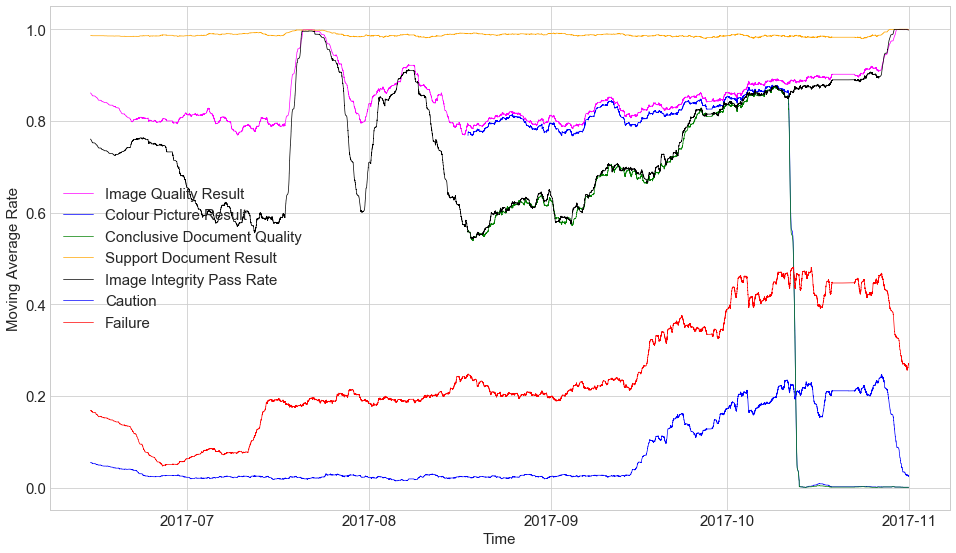

In [53]:
fig = plt.figure(figsize=(25,7))
ax = fig.add_axes([0,0,0.5,1])
plt.rcParams['font.size'] = '15'
plt.rcParams["font.family"] = "Helvetica"
plt.style.use('seaborn-whitegrid')

ax.plot(iq['image_quality_result_binary'].rolling(window=4000).mean(),
        label='Image Quality Result', color='magenta', linewidth=0.7)

ax.plot(cp['colour_picture_result_binary'].rolling(window=4000).mean(),
        label='Colour Picture Result', color='blue', linewidth=0.7)

ax.plot(cdq['conclusive_document_quality_result_binary'].rolling(window=4000).mean(),
        label='Conclusive Document Quality', color='green', linewidth=0.7)

ax.plot(sp['supported_document_result_binary'].rolling(window=4000).mean(),
        label='Support Document Result', color='orange', linewidth=0.7)

ax.plot(df['image_integrity_result_binary'].rolling(window=4000).mean(),
        label='Image Integrity Pass Rate', color='black', linewidth=0.7)

ax.plot(caution.rolling(window=4000).mean(),
        label='Caution', color='blue', linewidth=0.7)

ax.plot(failure.rolling(window=4000).mean(),
        label='Failure', color='red', linewidth=0.7)

ax.legend(loc=0)
plt.ylabel("Moving Average Rate",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.show()